# Features:
MedInc: Median income
HouseAge: Avg house age
AveRooms: Avg number of rooms.
AveBedrms: Avg number of bedrooms.
Population: Pop in block.
AveOccup: Avg household size.
Latitude: Cooridate
Longitude: Cooridate

# Goal
MedHouseVal: Median house value for households within a block.



---



# **Steps**

1.Import Libraries and Dataest (California Housing Dataset)

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2.Loading the data
x =features
y=targeted values

In [ ]:
data = fetch_california_housing()
X = data.data
y = data.target

3.Standerdise features


In [ ]:
def standardize_features(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    stds[stds == 0] = 1
    X_standardized = (X - means) / stds
    return X_standardized, means, stds

4.Poly Features


In [ ]:
def polynomial_features(X, degree):
    n_samples, n_features = X.shape
    X_poly = X
    for d in range(2, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    return X_poly

5.Data Split
[training (60%), validation (20%), and testing (20%) sets]

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

6.Gradient Descent

In [ ]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Prediction and error
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)

        # Update theta parameters
        theta -= learning_rate * gradient

        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

        if i < 5:
            print(f"Iteration {i + 1}: Cost = {cost}")

    return theta, cost_history


7.Poly degrees and learning rates

In [ ]:
best_degree = 2
best_learning_rate = 0.001
iterations = 1000

8.Evaluate test set

In [ ]:
X_train_poly = polynomial_features(X_train, best_degree)
X_train_poly, mean_train, std_train = standardize_features(X_train_poly)

X_val_poly = polynomial_features(X_val, best_degree)
X_val_poly = (X_val_poly - mean_train) / std_train  # training mean and std for standardization

X_test_poly = polynomial_features(X_test, best_degree)
X_test_poly = (X_test_poly - mean_train) / std_train  # training mean and std for standardization

theta = np.zeros(X_train_poly.shape[1])

theta_best, cost_history = gradient_descent(X_train_poly, y_train, theta, best_learning_rate, iterations)

print("Final cost values:", cost_history[-5:])

Iteration 1: Cost = 0.5030588937383306
Iteration 2: Cost = 0.502327465898665
Iteration 3: Cost = 0.5015984464065337
Iteration 4: Cost = 0.5008718266617109
Iteration 5: Cost = 0.5001475980962152
Final cost values: [0.2724844903803163, 0.27243239758917653, 0.2723804003254507, 0.2723284983214084, 0.27227669131018595]




---



# Visualizationn

1.Cost Hist



*  The curve starts at a high initial cost and decrease over time as the model parameters are adjusted to minimize the error on the training data.
*  The steep drop at the beginning indicates that the model is learning quickly, making large improvements in the first few iterations.
*   The plot should flatten out toward the end, which suggests the model is converging to an optimal solution.

Conclusion: A smooth, decreasing curve confirms that gradient descent is working as expected. A sudden spike or divergence might suggest issues, such as an excessively high learning rate.

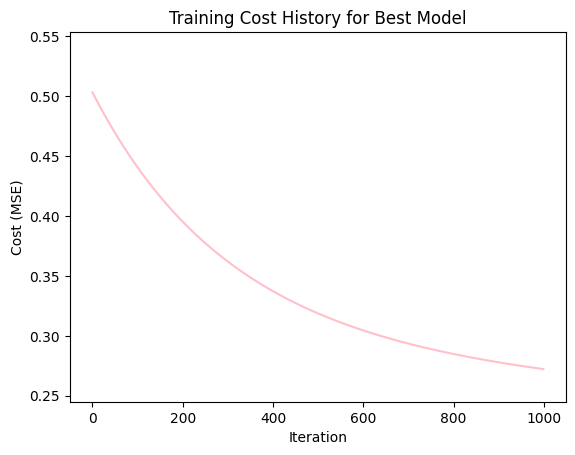

In [ ]:
plt.plot(cost_history, color='pink')
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Training Cost History for Best Model")
plt.ylim(min(cost_history) * 0.9, max(cost_history) * 1.1)
plt.show()

2.Predict vs Actual

* A large spread, especially as values increase, might indicate that the model struggles to generalize well across different ranges of house prices.
*   Deviation from Line: Points far from the line represent prediction errors. If there are systematic patterns, this might suggest underfitting or overfitting.

Conclusion: Potential Issues  such as consistent bias, it might indicate that the model could benefit from adjustments, like a different polynomial degree or additional features.


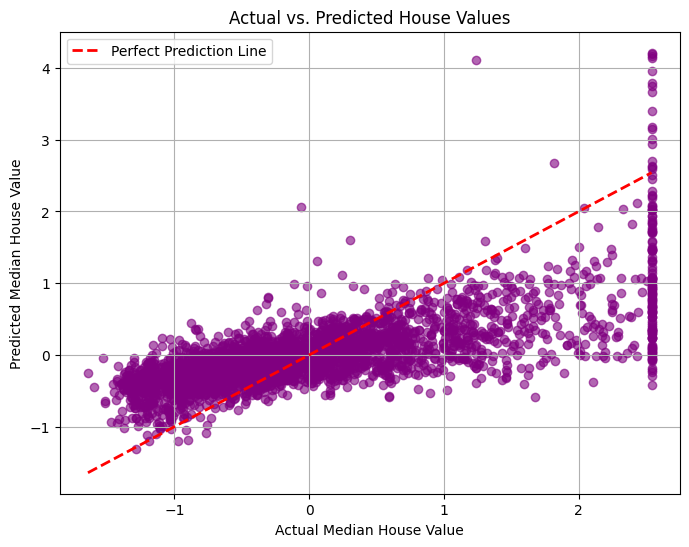

In [ ]:
y_pred_test = X_test_poly.dot(theta_best)

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction Line')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted House Values")
plt.legend()
plt.grid(True)
plt.show()